In [1]:
from fastai.vision.all import *




In [2]:
path = Path('fruits')

In [3]:
fns = get_image_files(path)

In [4]:
fns

(#1403) [Path('fruits/pepper/163_100.jpg'),Path('fruits/pepper/154_100.jpg'),Path('fruits/pepper/180_100.jpg'),Path('fruits/pepper/195_100.jpg'),Path('fruits/pepper/161_100.jpg'),Path('fruits/pepper/26_100.jpg'),Path('fruits/pepper/152_100.jpg'),Path('fruits/pepper/234_100.jpg'),Path('fruits/pepper/226_100.jpg'),Path('fruits/pepper/r_119_100.jpg')...]

In [14]:
## This is a data loader

## parent_label -> simply gets the name of the folder a file is in

fruits = DataBlock(
     blocks = (ImageBlock, CategoryBlock),
     get_items = get_image_files,
     splitter = RandomSplitter(valid_pct=0.2, seed=42),
     get_y = parent_label,
     item_tfms = Resize(128)  ## by default it crops
)

In [15]:
dls = fruits.dataloaders(path)

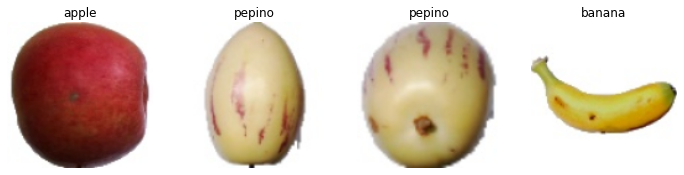

In [16]:
## by defaullt it will give the model batches of 64 for training and testing

## to view

dls.valid.show_batch(max_n=4, nrows=1)

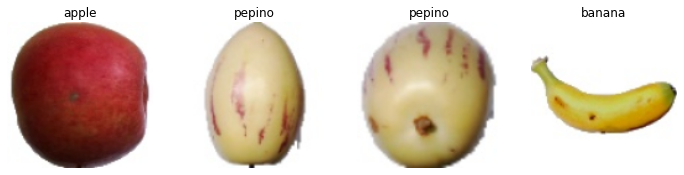

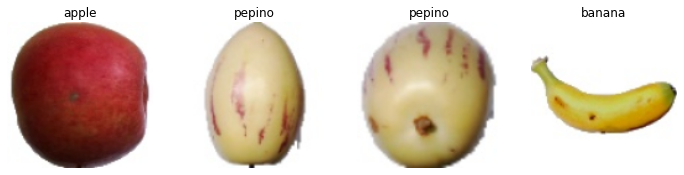

In [19]:
## instead of cropping

## we can pad the images

fruits = fruits.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

## or we can squish them

fruits = fruits.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


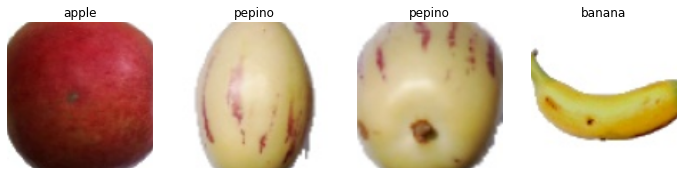

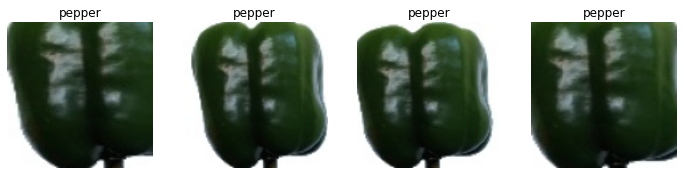

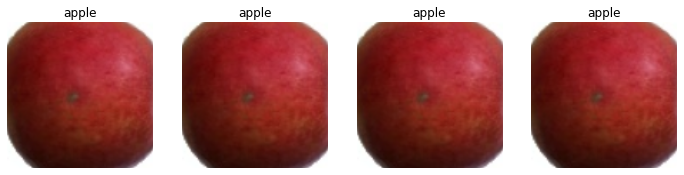

In [20]:
## random cropping of an image is considered better

fruits = fruits.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


fruits = fruits.new(item_tfms=RandomResizedCrop(128, min_scale=0.5))
dls = fruits.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)



fruits = fruits.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, unique=True)


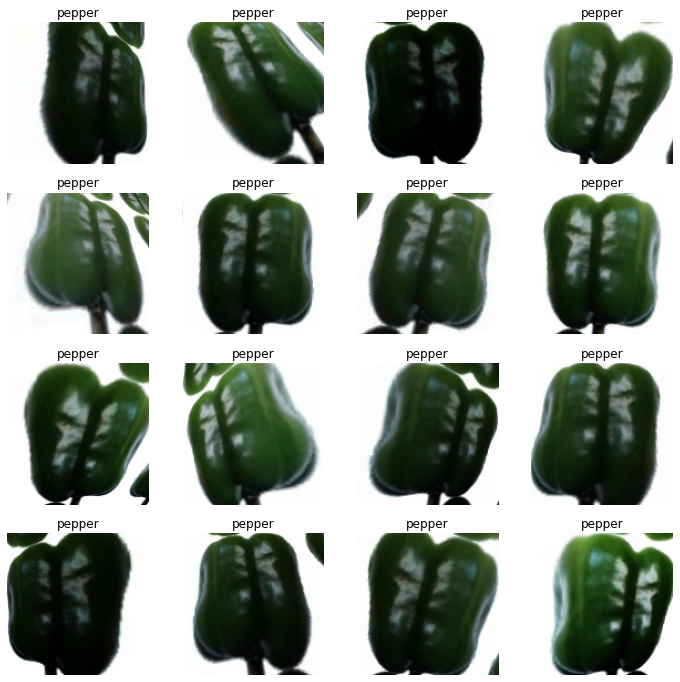

In [26]:
## data augmentation: rotation, flipping, perspective warping, contrast and brightness changes
## via GPU intensive batch_transforms

fruits = fruits.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = fruits.dataloaders(path)
dls.train.show_batch(max_n=16, nrows=4, unique=True)

In [27]:
## now fine tune cnn_learner with our data

fruits = fruits.new(
     item_tfms=RandomResizedCrop(224, min_scale=0.5),
     batch_tfms=aug_transforms()
)

dls = fruits.dataloaders(  path  )

learn = cnn_learner(dls, resnet18, metrics=error_rate)

learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/maquina1/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.848559,0.000097,0.000000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.000991,0.000012,0.000000,00:02
1,0.000874,0.000004,0.000000,00:02
2,0.000529,0.000001,0.000000,00:02
3,0.000534,0.000001,0.000000,00:02


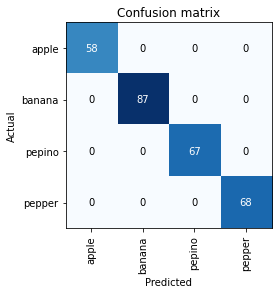

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

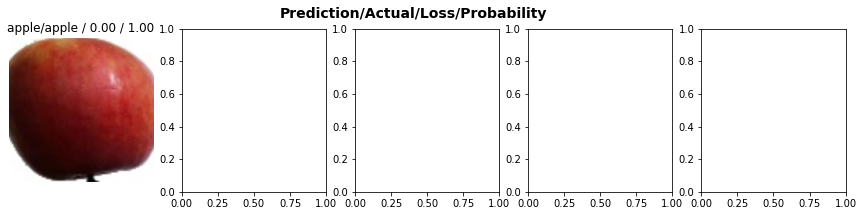

In [32]:
## plot_top_losses shows us the images with the highest loss in our dataset


interp.plot_top_losses(5, nrows=1)

In [33]:
## will save a export file called export.pkl to save the model


learn.export()